In [151]:
import pandas as pd
import numpy as np
import glob

In [152]:
# Lectura de los archivos csv y guardado de todos los datos en un archivo único.
# Pongo dtype=object porque sale un warning porque hay types mixtos. Esto cambia todos los tipos a object
# aunque inicialmente puede ser mejor dejarlos como están ya que casi todas las columnas son float
# e interesa que sigan así.

#df1 = pd.read_csv('../data/raw/data_1.csv',dtype=object)
#df2 = pd.read_csv('../data/raw/data_all.csv', dtype=object)

df1 = pd.read_csv('../data/raw/data_1.csv')
df2 = pd.read_csv('../data/raw/data_all.csv')
list_df = [df2,df1]
data_all_parameters = pd.concat(list_df, ignore_index=False, axis=0, sort=False)
data_all_parameters.to_csv('../data/raw/data_all_parameters.csv')
data_all_parameters

,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),Bolus Type,...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38915,16/11/2015,15:22:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,...,NaN,NaN,NaN,NaN,BOLUS_WIZARD,NaN,NaN,NaN,NaN,NaN
38916,16/11/2015,15:16:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,...,NaN,NaN,NaN,NaN,BOLUS_WIZARD,NaN,NaN,NaN,NaN,NaN
38917,16/11/2015,15:16:55,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38918,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,STEP_0_POINT_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df = data_all_parameters
df.dtypes


Date                                    object
Time                                    object
New Device Time                         object
BG Reading (mg/dL)                     float64
Linked BG Meter ID                      object
Basal Rate (U/h)                       float64
Temp Basal Amount                      float64
Temp Basal Type                         object
Temp Basal Duration (h:mm:ss)           object
Bolus Type                              object
Bolus Volume Selected (U)              float64
Bolus Volume Delivered (U)             float64
Bolus Duration (h:mm:ss)                object
Prime Type                              object
Prime Volume Delivered (U)             float64
Alarm                                   object
Suspend                                 object
Rewind                                  object
BWZ Estimate (U)                       float64
BWZ Target High BG (mg/dL)             float64
BWZ Target Low BG (mg/dL)              float64
BWZ Carb Rati

In [154]:
df.columns.tolist()

['Date',
 'Time',
 'New Device Time',
 'BG Reading (mg/dL)',
 'Linked BG Meter ID',
 'Basal Rate (U/h)',
 'Temp Basal Amount',
 'Temp Basal Type',
 'Temp Basal Duration (h:mm:ss)',
 'Bolus Type',
 'Bolus Volume Selected (U)',
 'Bolus Volume Delivered (U)',
 'Bolus Duration (h:mm:ss)',
 'Prime Type',
 'Prime Volume Delivered (U)',
 'Alarm',
 'Suspend',
 'Rewind',
 'BWZ Estimate (U)',
 'BWZ Target High BG (mg/dL)',
 'BWZ Target Low BG (mg/dL)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Food Estimate (U)',
 'BWZ Active Insulin (U)',
 'Sensor Calibration BG (mg/dL)',
 'Sensor Glucose (mg/dL)',
 'ISIG Value',
 'Event Marker',
 'Bolus Number',
 'Bolus Cancellation Reason',
 'BWZ Unabsorbed Insulin Total (U)',
 'Final Bolus Estimate',
 'Scroll Step Size',
 'Insulin Action Curve Time',
 'Sensor Calibration Rejected Reason',
 'Preset Bolus',
 'Bolus Source',
 'Network Device Assoc

In [155]:
# Se muestran los valores nulos

df.isnull().sum()

Date                                       0
Time                                       0
New Device Time                        72515
BG Reading (mg/dL)                     63014
Linked BG Meter ID                     67005
Basal Rate (U/h)                       44119
Temp Basal Amount                      71862
Temp Basal Type                        71862
Temp Basal Duration (h:mm:ss)          71862
Bolus Type                             59447
Bolus Volume Selected (U)              59477
Bolus Volume Delivered (U)             66006
Bolus Duration (h:mm:ss)               72509
Prime Type                             71687
Prime Volume Delivered (U)             71687
Alarm                                  68442
Suspend                                69677
Rewind                                 72116
BWZ Estimate (U)                       66179
BWZ Target High BG (mg/dL)             66179
BWZ Target Low BG (mg/dL)              66179
BWZ Carb Ratio (U/Ex)                  66179
BWZ Insuli

In [156]:
# Se muestran los % de valores nulos por columnas

null_cols = df.isnull().sum()

null_cols[null_cols > 0]
null_cols[null_cols > 0] / len(df) * 100

New Device Time                         99.971049
BG Reading (mg/dL)                      86.872725
Linked BG Meter ID                      92.374821
Basal Rate (U/h)                        60.823591
Temp Basal Amount                       99.070806
Temp Basal Type                         99.070806
Temp Basal Duration (h:mm:ss)           99.070806
Bolus Type                              81.955167
Bolus Volume Selected (U)               81.996526
Bolus Volume Delivered (U)              90.997574
Bolus Duration (h:mm:ss)                99.962777
Prime Type                              98.829547
Prime Volume Delivered (U)              98.829547
Alarm                                   94.355906
Suspend                                 96.058509
Rewind                                  99.420977
BWZ Estimate (U)                        91.236076
BWZ Target High BG (mg/dL)              91.236076
BWZ Target Low BG (mg/dL)               91.236076
BWZ Carb Ratio (U/Ex)                   91.236076


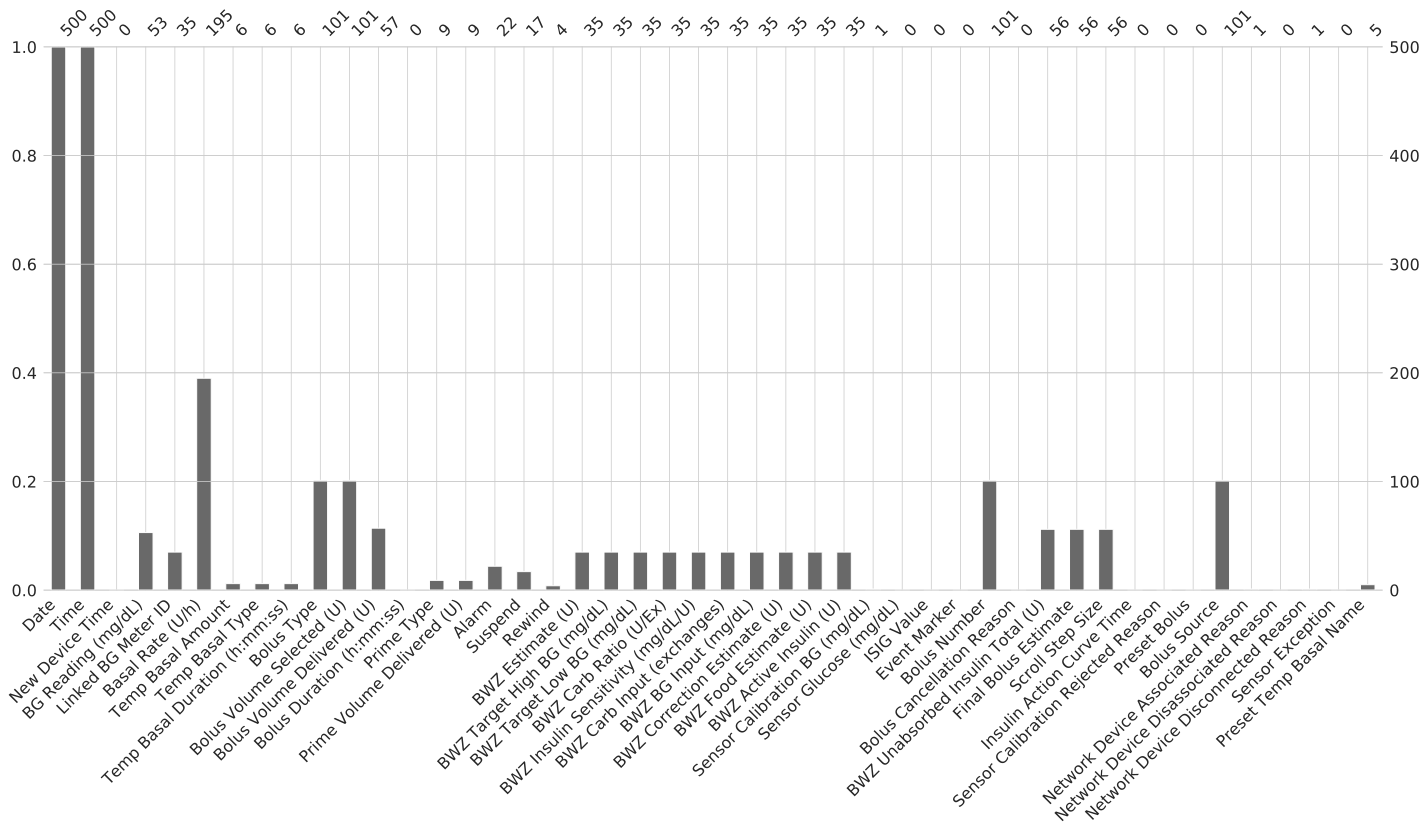

In [157]:
import missingno

%matplotlib inline

# it is necessary to sample data since otherwise the plot would be over-populated 
# se plotea diagrama de barras para ver en qué columnas hay mas nulos cogiendo 500 datos de muestra.
sample_data = df.sample(500, random_state=42)
missingno.bar(sample_data);


In [158]:
# Se definen drop_columns y se borran.
drop_columns = ['New Device Time', 'BG Reading (mg/dL)',\
                'Linked BG Meter ID', 'Temp Basal Amount',\
                'Temp Basal Type', 'Temp Basal Duration (h:mm:ss)', 'Bolus Type',\
                'Bolus Volume Selected (U)', 'Bolus Volume Delivered (U)',\
                'Bolus Duration (h:mm:ss)', 'Prime Type', 'Prime Volume Delivered (U)',\
                'Alarm', 'Suspend', 'Rewind', \
                'BWZ Target High BG (mg/dL)', 'BWZ Target Low BG (mg/dL)',\
                'Sensor Calibration BG (mg/dL)',\
                'Sensor Glucose (mg/dL)', 'ISIG Value', 'Event Marker', 'Bolus Number',\
                'Bolus Cancellation Reason',\
                'Final Bolus Estimate', 'Scroll Step Size', 'Insulin Action Curve Time',\
                'Sensor Calibration Rejected Reason', 'Preset Bolus', 'Bolus Source',\
                'Network Device Associated Reason',\
                'Network Device Disassociated Reason',\
                'Network Device Disconnected Reason', 'Sensor Exception',\
                'Preset Temp Basal Name']
data_cols_goods = df.drop(drop_columns, axis=1)
data_cols_goods

,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
0,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38915,16/11/2015,15:22:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38916,16/11/2015,15:16:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38917,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38918,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [159]:
# Rellenamos los valores nulos de las columnas según los valores que hay por encima.
# Por el orden en el que salen en el archivo csv necesitamos hacer foward fill (ffill) a BWZ Unabsorbed
# insulin Total(U/h)
# y necesitamos hacer back fill (bfill) a la columna de Basal Rate (U/h)


data_cols_goods['Basal Rate (U/h)'] = data_cols_goods['Basal Rate (U/h)'].fillna(method ='bfill')
data_cols_goods['BWZ Unabsorbed Insulin Total (U)']= \
                data_cols_goods['BWZ Unabsorbed Insulin Total (U)'].fillna(method ='ffill')
data_cols_goods

,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
0,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38915,16/11/2015,15:22:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
38916,16/11/2015,15:16:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
38917,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
38918,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [160]:
# Eliminamos filas que están repetidas
data_cols_goods.duplicated().sum()

16599

In [161]:
# Se eliminan las filas con nulos
data_without_nulls = data_cols_goods.dropna()
data_without_nulls



,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
16,25/03/2020,22:18:54,1.95,9.5,1.0,45.0,9.5,84.0,0.0,9.5,0.0,0.0
60,25/03/2020,8:35:19,1.60,6.6,1.9,45.0,3.5,111.0,0.0,6.6,0.0,0.0
82,24/03/2020,22:26:09,1.95,5.5,1.0,45.0,5.5,99.0,0.0,5.5,0.0,0.0
103,24/03/2020,18:35:33,2.70,4.4,1.1,45.0,4.0,97.0,0.0,4.4,1.2,0.0
118,24/03/2020,15:20:03,2.20,11.2,1.5,45.0,7.5,75.0,0.0,11.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38868,17/11/2015,14:21:04,0.40,9.5,1.0,50.0,9.5,126.0,0.1,9.5,1.3,0.1
38873,17/11/2015,12:22:57,0.40,3.0,1.0,50.0,3.0,103.0,0.0,3.0,0.0,0.0
38887,17/11/2015,7:40:19,0.40,2.4,0.8,50.0,3.0,101.0,0.0,2.4,0.0,0.0
38898,16/11/2015,21:34:04,0.60,8.7,1.0,50.0,8.5,173.0,1.0,8.5,0.8,0.8


In [162]:
# Para poder utilizar los valores de la columna Date y Time después hay que pasarlos a formato 'datetime' 
data_without_nulls['Date'] = pd.to_datetime(data_without_nulls['Date'])
data_without_nulls['Time'] = pd.to_datetime(data_without_nulls['Time'])



/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
# Obtenemos features de las columnas 'Date' y 'Time' 
data_without_nulls['day_of_month'] = data_without_nulls['Date'].dt.day
data_without_nulls['day_of_week'] = data_without_nulls['Date'].dt.dayofweek
data_without_nulls['month_of_year'] = data_without_nulls['Date'].dt.month
data_without_nulls['hour'] = data_without_nulls['Time'].dt.hour

data_without_nulls.to_csv('a.csv')

data_without_nulls .dtypes


/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Date                                 datetime64[ns]
Time                                 datetime64[ns]
Basal Rate (U/h)                            float64
BWZ Estimate (U)                            float64
BWZ Carb Ratio (U/Ex)                       float64
BWZ Insulin Sensitivity (mg/dL/U)           float64
BWZ Carb Input (exchanges)                  float64
BWZ BG Input (mg/dL)                        float64
BWZ Correction Estimate (U)                 float64
BWZ Food Estimate (U)                       float64
BWZ Active Insulin (U)                      float64
BWZ Unabsorbed Insulin Total (U)            float64
day_of_month                                  int64
day_of_week                                   int64
month_of_year                                 int64
hour                                          int64
dtype: object

In [164]:
data_without_nulls.describe().T


,count,mean,std,min,25%,50%,75%,max
Basal Rate (U/h),6356.0,0.893022,0.293308,0.0,0.70,0.90,1.0,2.7
BWZ Estimate (U),6356.0,4.799481,2.619866,0.0,2.70,4.40,6.6,18.0
BWZ Carb Ratio (U/Ex),6356.0,0.877302,0.178301,0.5,0.78,0.83,1.0,1.9
BWZ Insulin Sensitivity (mg/dL/U),6356.0,49.457992,2.238979,40.0,50.00,50.00,50.0,50.0
BWZ Carb Input (exchanges),6356.0,5.044053,2.782070,0.0,3.00,5.00,7.5,12.5
BWZ BG Input (mg/dL),6356.0,133.803335,68.345047,0.0,100.00,105.00,162.0,542.0
BWZ Correction Estimate (U),6356.0,0.541347,1.052215,-0.5,0.00,0.00,0.7,8.4
BWZ Food Estimate (U),6356.0,4.398348,2.610547,0.0,2.40,4.00,6.3,18.0
BWZ Active Insulin (U),6356.0,0.474622,0.984862,0.0,0.00,0.00,0.5,10.3
BWZ Unabsorbed Insulin Total (U),6356.0,0.140356,0.442569,0.0,0.00,0.00,0.0,5.8


In [165]:
# Se eliminan las filas duplicadas

data_without_duplicates = data_without_nulls.drop_duplicates()
data_without_duplicates.columns

Index(['Date', 'Time', 'Basal Rate (U/h)', 'BWZ Estimate (U)',
       'BWZ Carb Ratio (U/Ex)', 'BWZ Insulin Sensitivity (mg/dL/U)',
       'BWZ Carb Input (exchanges)', 'BWZ BG Input (mg/dL)',
       'BWZ Correction Estimate (U)', 'BWZ Food Estimate (U)',
       'BWZ Active Insulin (U)', 'BWZ Unabsorbed Insulin Total (U)',
       'day_of_month', 'day_of_week', 'month_of_year', 'hour'],
      dtype='object')

In [166]:
# Se cuenta el número de duplicados
data_without_nulls.duplicated().sum()

0

In [167]:
# Se eliminan las columnas 'Date' y 'Time' ya que se han formado las columnas
# 'day_of_month', 'day_of_week', 'month_of_year' y 'hour' (datos categóricos) a partir de ellas.
data_without_Date_and_Time = data_without_nulls.drop(['Date', 'Time'], axis=1)


In [168]:
filter_low_index = data_without_Date_and_Time['BWZ BG Input (mg/dL)'] < 70
filter_high_index = data_without_Date_and_Time['BWZ BG Input (mg/dL)'] > 140

In [169]:
sum(filter_low_index)


244

In [170]:
sum(filter_high_index)

2074

In [171]:
# Eliminamos datos que no son buenos para realizar el entrenamiento, es decir, datos de lectura
# de niveles de insulina altos o bajos aplicando un filtro.

a= data_without_Date_and_Time[~(filter_low_index | filter_high_index)]

# Se actualiza el index

Data = a.reset_index(drop = True)  # Drop = True para que no aparezca el index antiguo


# Se pasa a categórica las columnas ['day_of_month', 'day_of_week', 'month_of_year', 'hour']
Data['day_of_month'] = Data['day_of_month'].astype(str)
Data['day_of_week'] = Data['day_of_week'].astype(str)
Data['month_of_year'] = Data['month_of_year'].astype(str)
Data['hour'] = Data['hour'].astype(str)


Data.to_csv('../data/processed/Data.csv')

Data.dtypes


Basal Rate (U/h)                     float64
BWZ Estimate (U)                     float64
BWZ Carb Ratio (U/Ex)                float64
BWZ Insulin Sensitivity (mg/dL/U)    float64
BWZ Carb Input (exchanges)           float64
BWZ BG Input (mg/dL)                 float64
BWZ Correction Estimate (U)          float64
BWZ Food Estimate (U)                float64
BWZ Active Insulin (U)               float64
BWZ Unabsorbed Insulin Total (U)     float64
day_of_month                          object
day_of_week                           object
month_of_year                         object
hour                                  object
dtype: object

In [172]:
Data.loc[:,['day_of_month', 'day_of_week', 'month_of_year', 'hour']]


,day_of_month,day_of_week,month_of_year,hour
0,25,2,3,22
1,25,2,3,8
2,24,1,3,22
3,24,1,3,18
4,24,1,3,15
...,...,...,...,...
4033,17,1,11,21
4034,17,1,11,17
4035,17,1,11,14
4036,17,1,11,12


In [173]:
#Se guardan los datos para entrenar y para hacer el test en el modelo
Data_train = Data.iloc[:3500,]
Data_test = Data.iloc[3500:,]
Data_train.to_csv('../data/processed/Data_train.csv')
Data_test.to_csv('../data/processed/Data_test.csv')


In [174]:
Data.corr()

,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
Basal Rate (U/h),1.000000,0.133947,0.357882,-0.519004,-0.011075,0.027332,-0.077546,0.135003,0.122522,-0.042164
BWZ Estimate (U),0.133947,1.000000,0.376667,-0.319346,0.899423,0.005378,0.018479,0.999869,-0.026865,0.029095
BWZ Carb Ratio (U/Ex),0.357882,0.376667,1.000000,-0.558789,-0.026901,0.017754,0.025611,0.376601,-0.023677,0.038610
BWZ Insulin Sensitivity (mg/dL/U),-0.519004,-0.319346,-0.558789,1.000000,-0.066684,-0.038928,0.049376,-0.319927,-0.107205,0.031096
BWZ Carb Input (exchanges),-0.011075,0.899423,-0.026901,-0.066684,1.000000,-0.007388,-0.007008,0.899522,-0.046630,0.005302
BWZ BG Input (mg/dL),0.027332,0.005378,0.017754,-0.038928,-0.007388,1.000000,0.468399,-0.000521,0.077998,0.297239
BWZ Correction Estimate (U),-0.077546,0.018479,0.025611,0.049376,-0.007008,0.468399,1.000000,0.006123,0.007848,0.651861
BWZ Food Estimate (U),0.135003,0.999869,0.376601,-0.319927,0.899522,-0.000521,0.006123,1.000000,-0.025680,0.028956
BWZ Active Insulin (U),0.122522,-0.026865,-0.023677,-0.107205,-0.046630,0.077998,0.007848,-0.025680,1.000000,0.097956
BWZ Unabsorbed Insulin Total (U),-0.042164,0.029095,0.038610,0.031096,0.005302,0.297239,0.651861,0.028956,0.097956,1.000000


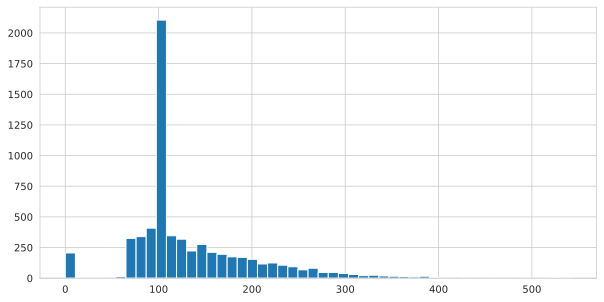

In [175]:
# Plot datos sin filtros
data_cols_goods['BWZ BG Input (mg/dL)'].hist(figsize=(10, 5), bins=50);


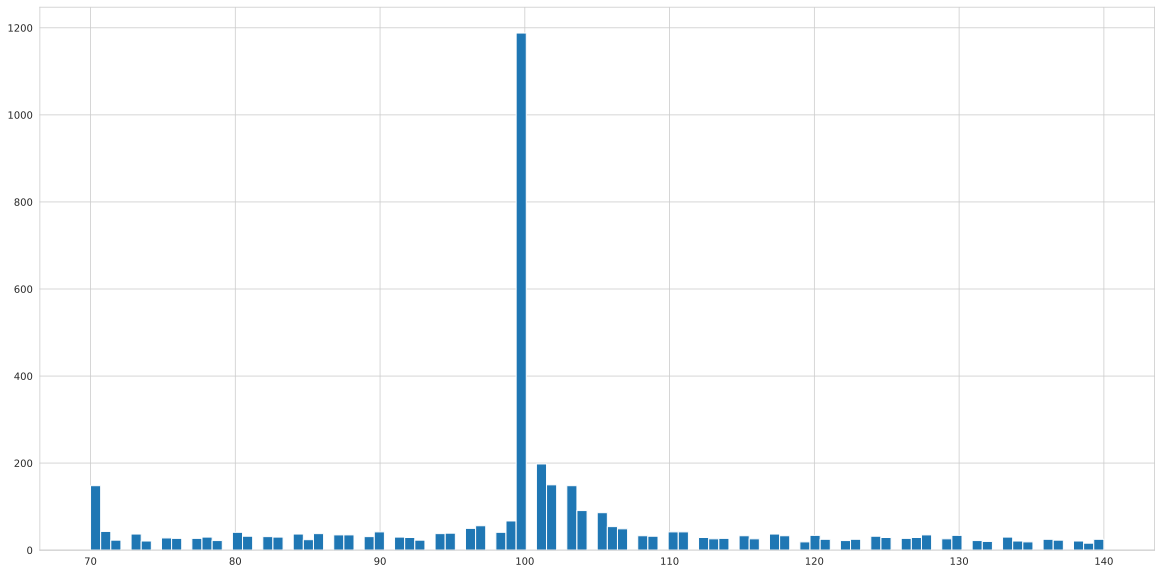

In [176]:
# Plot datos con filtro, eliminadas las lecturas bjas y altas de glucosa en sangre
Data['BWZ BG Input (mg/dL)'].hist(figsize=(20, 10), bins=100);

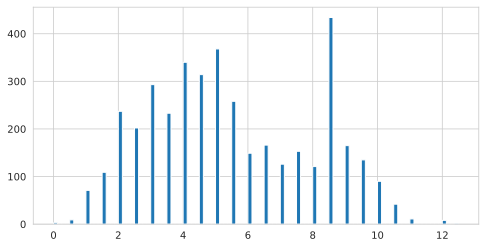

In [177]:
#Carbohidrados tomados por raciones
Data['BWZ Carb Input (exchanges)'].hist(figsize=(8, 4), bins=100);

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')
sns.set_style('whitegrid')

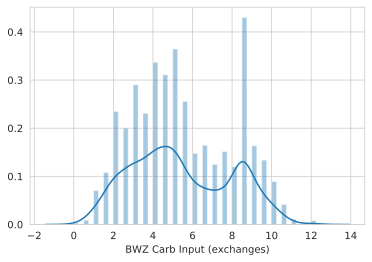

In [179]:
sns.distplot(Data['BWZ Carb Input (exchanges)'], bins=50);

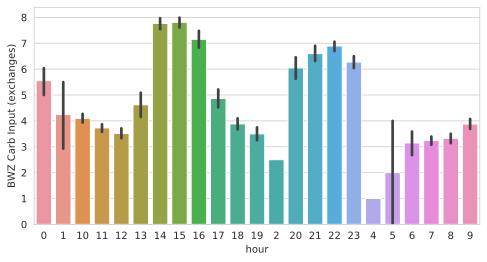

In [180]:
fig = plt.figure(figsize=(8, 4))
ax = sns.barplot(x='hour', y='BWZ Carb Input (exchanges)', data=Data)

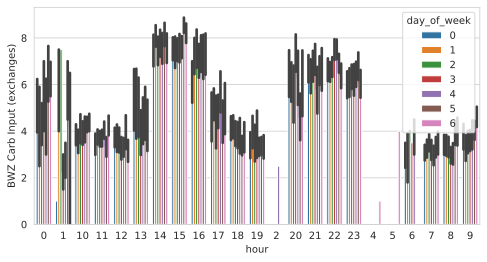

In [181]:
fig = plt.figure(figsize=(8, 4))
ax = sns.barplot(x='hour', y='BWZ Carb Input (exchanges)',hue='day_of_week', data=Data)

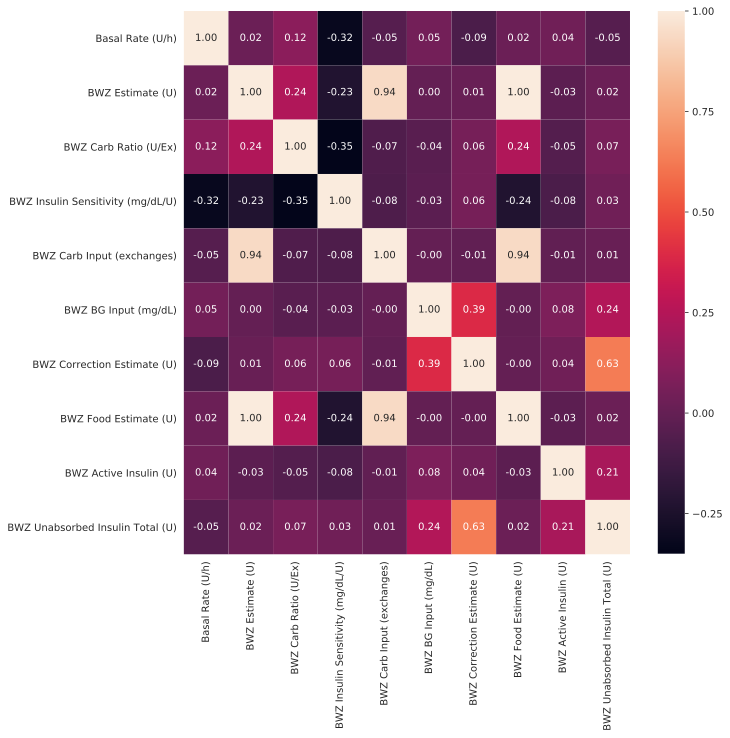

In [182]:
# Plot de correlación son seaborn metodo de spearman
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

sns.heatmap(Data.corr(method='spearman'), annot=True, fmt='.2f', ax=ax);

## Según la tabla de correlación, habría que eliminar la columna de BWZ Food Estimate (U)

* Pero ¿LA COLUMNA DE Carb Input (exchanges)? es una columna de correlación 0.94 y si la elimino el modelo predeciría la insulina a administrar sin tener en cuenta los carbohidratos que se comen, ¿qué es mejor? 
